# Лабораторная работа 9.12 Макарова Мария
# Метод Розенброка 3 порядка для задачи экогенетической модели

In [66]:
import numpy as np              
import matplotlib.pyplot as plt
from numpy.linalg import solve

Начальные данные я взяла вблизи точки равновесия ( 0.4 10/7 5/7) 

In [93]:
h = 0.01
Tk = 1500
x = np.array ( [ 0.4 + 0.5 , 10/7 + 0.5, 5/7 +0.1])
N = 3

Коэффициенты метода:

In [94]:
p1 = 0.4369
p2 = 0.4782
p3 = 0.0859
a = 0.4369
b21 = 0.4369
b31 = 0.4369
b32 = -2.1161

Матрица Якоби :

In [95]:
def J(x):   
    J = np.zeros(N*N , dtype = float).reshape(N,N)
    J[0][0] = 1-x[0]-2*x[1]/(7*x[2]*x[2])
    J[0][1] = - 2*x[0]/(7*x[2]*x[2])
    J[0][2] = 4*x[1]*x[0]/(7*x[2]*x[2]*x[2])
  
    J[1][0] = -3.5*x[2]*x[2]*x[1]
    J[1][1] = 2*x[2] -3.5*x[2]*x[2]*x[0]  -x[1]          
    J[1][2] =  2*x[1]-7*x[0]*x[1]*x[2]                    
      
    J[2][0] = - 7 * 0.01 * x[2]        
    J[2][2] =  - 7 * 0.01 *x[0] 
    return(J)
E = np.eye(N)

Данная в условии система уравнений :

In [96]:
def f(y):
    s = np.copy(y);
    s[0] = y[0] * (1 - 0.5* y[0] - 2 * y[1] / (7 * y[2]*y[2]));
    s[1] = y[1]*(2*y[2] - 3.5 * y[0] * y[2]*y[2] - 0.5 * y[1]);
    s[2] = 0.01*(2 - 7 * y[0]*y[2]);
    return (s)

По формулам метода рассчитываю на каждой итерации коэффициенты , а потом полученные векторы добавляю в матрицу Res :

In [97]:
Res = np.array([np.copy(x)])


for i in range (int(Tk/h)):
    k1 = np.linalg.solve(((E)+a*h*J(x)),(h*f(x)))
    k2 = np.linalg.solve(((E)+a*h*J(x)),(h*f(x) + b21*k1))
    k3 = np.linalg.solve(((E)+a*h*J(x)),(h*f(x + b31*k1 + b32 * k2)))
    x= x + p1*k1 + p2*k2 + p3*k3
    Res = np.append(Res,[x],axis = 0)
 

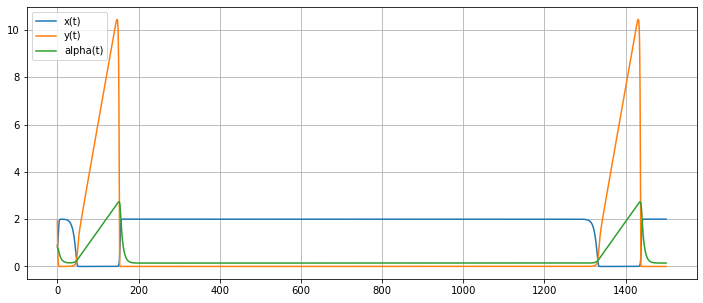

In [98]:
times = np.linspace(0, Tk, round(Tk / h)+1 )
plt.figure(figsize = [12, 5])

plt.plot(times, Res[:, 0], label = 'x(t)')
plt.legend(loc='best')
plt.plot(times, Res[:, 1], label = 'y(t)')
plt.legend(loc='best')
plt.plot(times, Res[:, 2], label = 'alpha(t)')
plt.legend(loc='best')
plt.grid()
plt.show()

Видим , что получили релаксационные колебания популяций, что согласуется с теорией :)